In [5]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(sum(y == 0), sum(y == 1))

212 357


In [3]:
def randomforest():
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model.predict(X_test)

def xgboost():
    bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
    bst.fit(X_train, y_train)
    return bst.predict(X_test)

def adaboost():
    ada = AdaBoostClassifier(n_estimators=100)
    ada.fit(X_train, y_train)
    return ada.predict(X_test)

def svm_model():
    model = svm.SVC(kernel='linear', probability=True, random_state=42)
    model.fit(X_train, y_train)
    model.predict(X_test)
    return model.predict(X_test)

def mlp():
    mlp = MLPClassifier(hidden_layer_sizes=(100,),  # 1 versteckte Schicht mit 100 Neuronen
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42)
    mlp.fit(X_train, y_train)
    return mlp.predict(X_test)

def confusionMatrix(prediction, model_name, ax):
    cm = confusion_matrix(y_test, prediction, labels=[0,1])
    tn, tp, fp, fn = cm[0][0], cm[1][1], cm[0][1], cm[1][0]
    f1_score = 2 * tp / (2 * tp + fp + fn)
    accuracy = accuracy_score(prediction, y_test)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
    disp.plot(ax=ax, colorbar=True)
    ax.set_title(f"{model_name}\nF1: {f1_score:.2f}, Acc: {accuracy:.2f}")
    return f1_score, accuracy

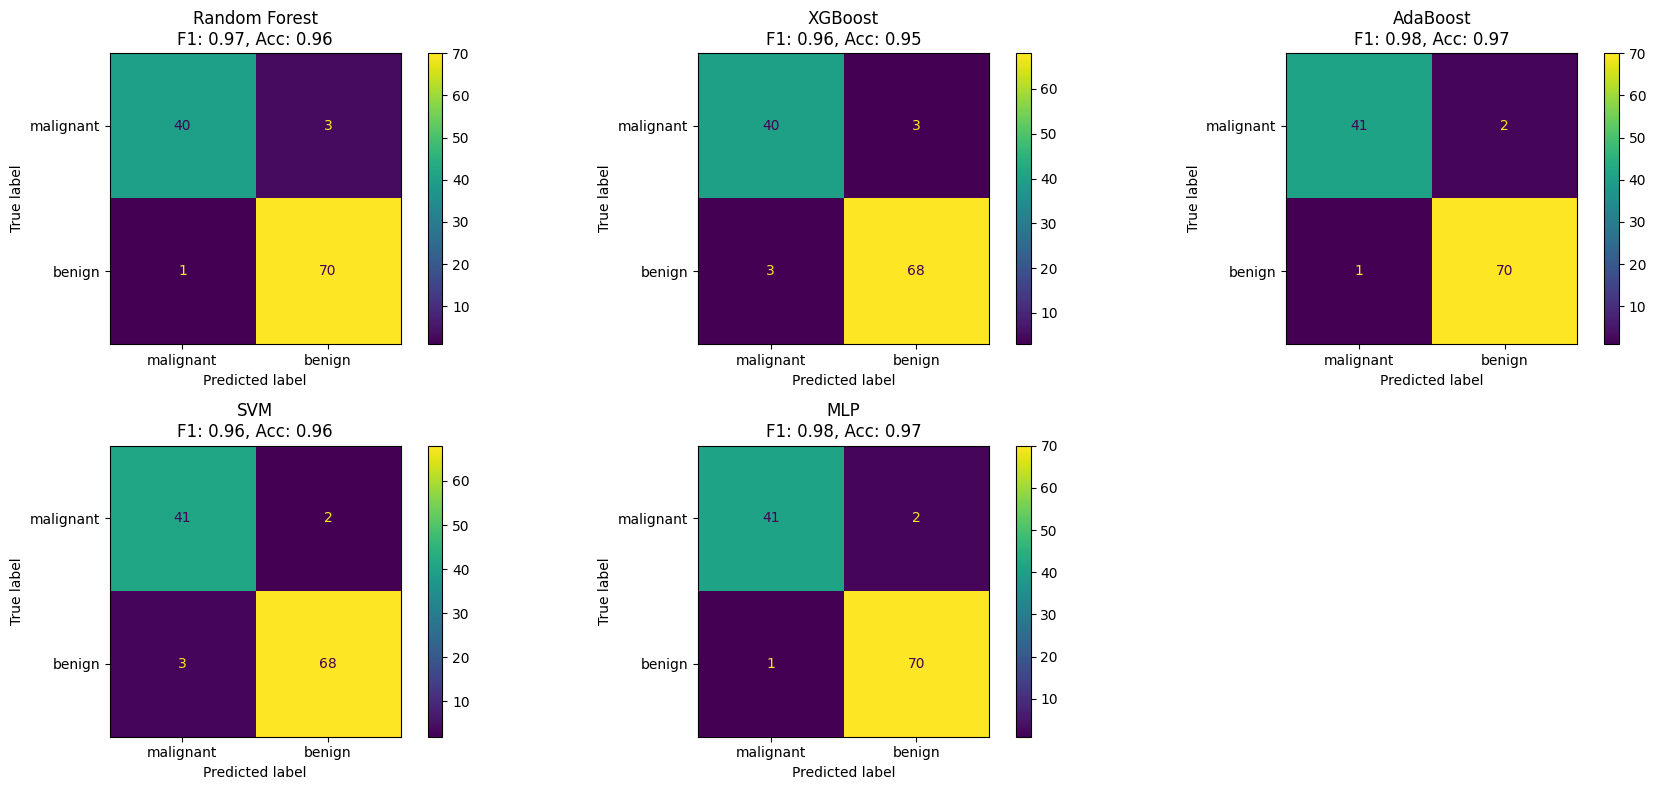

In [4]:
models = {
    "Random Forest": randomforest(),
    "XGBoost": xgboost(),
    "AdaBoost": adaboost(),
    "SVM": svm_model(),
    "MLP": mlp()
}

# Subplots: 2 Zeilen, 3 Spalten
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()  # 2D → 1D für einfaches Iterieren

# Plots füllen
for i, (name, prediction) in enumerate(models.items()):
    confusionMatrix(prediction, name, axes[i])

# Letztes leeres Feld ausschalten, falls weniger als 6 Modelle
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()